# Regression Task

# Introduction

House Sales in King County, USA
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

#Data link
https://www.kaggle.com/harlfoxem/housesalesprediction

#Description of Data
https://storage.googleapis.com/kaggle-forum-message-attachments/479761/11440/Screenshot%202019-02-27%20at%205.26.24%20PM.png


# Import Data

In [2]:
import pandas as pd
df = pd.read_csv('kc_house_data.csv')

Preprocess data: 
    1)Explore data, 
    2)check for missing data 
    3)apply data scaling. Justify the type of scaling used.

# Data Exploration

In [3]:
#Looking at top 5 rows
df.head()

,id,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,lat,long
0,1000102.0,280000.0,20140916T000000,6.0,NaN,2400.0,9373.0,2.0,0.0,0.0,...,7.0,2400.0,0.0,1991.0,0.0,98002.0,2060.0,7316.0,47.3262,-122.214
1,1000102.0,300000.0,20150422T000000,6.0,NaN,2400.0,9373.0,2.0,0.0,0.0,...,7.0,2400.0,0.0,1991.0,0.0,98002.0,2060.0,7316.0,47.3262,-122.214
2,1200019.0,647500.0,20140508T000000,NaN,1.75,2060.0,26036.0,1.0,0.0,0.0,...,8.0,1160.0,900.0,1947.0,0.0,98166.0,2590.0,21891.0,47.4444,-122.351
3,1200021.0,400000.0,20140811T000000,3.0,1.00,NaN,43000.0,1.0,0.0,0.0,...,7.0,1460.0,0.0,1952.0,0.0,98166.0,2250.0,20023.0,47.4434,-122.347
4,2800031.0,235000.0,20150401T000000,3.0,1.00,NaN,7599.0,1.5,0.0,0.0,...,6.0,1010.0,420.0,1930.0,0.0,98168.0,1290.0,10320.0,47.4783,-122.265


In [4]:
#Looking at the shape of our data
df.shape

(21613, 21)

In [5]:
#Looking at our data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               20511 non-null float64
price            20511 non-null float64
date             20511 non-null object
bedrooms         20409 non-null float64
bathrooms        20211 non-null float64
sqft_living      20407 non-null float64
sqft_lot         20111 non-null float64
floors           20407 non-null float64
waterfront       19411 non-null float64
view             19911 non-null float64
condition        19411 non-null float64
grade            19407 non-null float64
sqft_above       20111 non-null float64
sqft_basement    20100 non-null float64
yr_built         20381 non-null float64
yr_renovated     20175 non-null float64
zipcode          20511 non-null float64
sqft_living15    20461 non-null float64
sqft_lot15       20455 non-null float64
lat              20010 non-null float64
long             20010 non-null float64
dtypes: float64(20), object(1)
memory usage: 3.5+ MB

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,lat,long
count,2.051100e+04,2.051100e+04,20409.000000,20211.000000,20407.000000,2.011100e+04,20407.000000,19411.000000,19911.000000,19411.000000,19407.000000,20111.000000,20100.000000,20381.000000,20175.000000,20511.000000,20461.000000,20455.000000,20010.000000,20010.000000
mean,4.581106e+09,5.408132e+05,3.369886,2.118265,2085.025775,1.516386e+04,1.497329,0.007161,0.234242,3.403534,7.667903,1790.553031,290.039154,1971.358079,82.600991,98077.972600,1986.551390,12696.247617,47.559896,-122.213799
std,2.877755e+09,3.679500e+05,0.930733,0.768549,920.260643,4.207190e+04,0.540826,0.084321,0.767414,0.649183,1.174873,829.910491,441.543924,29.374221,397.552904,53.473251,686.355818,26811.912210,0.138530,0.141124
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000,47.155900,-122.519000
25%,2.123049e+09,3.225000e+05,3.000000,1.750000,1430.000000,5.027000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,0.000000,98033.000000,1481.000000,5100.000000,47.470625,-122.329000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.600000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000,47.571500,-122.230000
75%,7.321405e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.070150e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98118.000000,2363.000000,10080.000000,47.677600,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,858132.000000,47.777600,-121.315000


# Check and remove duplicated rows 

In [7]:
df[df.duplicated() == True].shape

(8, 21)

In [8]:
df = df.drop_duplicates(keep="last")
print(df.shape)

(21605, 21)


# Check for missing values

In [9]:
df.isna().sum()
#We can see 5% to 10% missing values

id               1094
price            1094
date             1094
bedrooms         1204
bathrooms        1402
sqft_living      1206
sqft_lot         1494
floors           1206
waterfront       2202
view             1702
condition        2202
grade            2206
sqft_above       1494
sqft_basement    1505
yr_built         1232
yr_renovated     1438
zipcode          1094
sqft_living15    1152
sqft_lot15       1158
lat              1595
long             1595
dtype: int64

# Data Cleaning and Imputation

#Drop insignificant variables

In [10]:
#Drop id and date column
df = df.drop(['id','date'] , axis=1)

In [11]:
#Remove rows with price(dependent variable) NA. 
df = df.dropna(subset =['price'])

In [12]:
#Check for missing values
df.isna().sum()

price               0
bedrooms         1204
bathrooms        1402
sqft_living      1206
sqft_lot          901
floors           1201
waterfront       2202
view             1702
condition        2202
grade            2206
sqft_above        901
sqft_basement     912
yr_built         1232
yr_renovated     1438
zipcode             0
sqft_living15    1151
sqft_lot15       1151
lat               501
long              501
dtype: int64

#Filling Missing value

In [13]:
#Fill Continous Features with mean. 
df['sqft_living'].fillna(df['sqft_lot'].mean(), inplace=True)
df['sqft_lot'].fillna(df['sqft_lot'].mean(), inplace=True)
df['sqft_above'].fillna(df['sqft_above'].mean(), inplace=True)
df['sqft_living15'].fillna(df['sqft_living15'].mean(), inplace=True)
df['sqft_lot15'].fillna(df['sqft_lot15'].mean(), inplace=True)


#Fill Categorical Features with Median
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)
df['floors'].fillna(df['floors'].median(), inplace=True)
df['condition'].fillna(df['condition'].median(), inplace=True)
df['grade'].fillna(df['grade'].median(), inplace=True)
df['yr_built'].fillna(df['yr_built'].median(), inplace=True)
df['lat'].fillna(df['lat'].median(), inplace=True)
df['long'].fillna(df['long'].median(), inplace=True)


#Fill with 0 group. 
#These columns seem to be missing maybe because the house do not have such facilites therefore filling with mean/median/mode does not make sense here
df['waterfront'].fillna(0, inplace=True)
df['view'].fillna(0, inplace=True)
df['sqft_basement'].fillna(0, inplace=True)


#Fill yr_renovated with yr_built 
#If renovated year is missing it probably means it was never renovated.
df['yr_renovated'].fillna(df['yr_built'], inplace=True)


In [14]:
#Check for missing values
df.isna().sum()

#Now we have no missing values

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
lat              0
long             0
dtype: int64

In [15]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,lat,long
price,1,0.3,0.51,0.17,0.088,0.25,0.24,0.38,0.031,0.62,0.59,0.31,0.057,0.082,-0.056,0.57,0.08,0.3,0.022
bedrooms,0.3,1,0.49,0.12,0.028,0.17,-0.016,0.072,0.021,0.33,0.46,0.28,0.15,-0.0028,-0.15,0.38,0.028,-0.0093,0.13
bathrooms,0.51,0.49,1,0.18,0.083,0.47,0.051,0.18,-0.12,0.6,0.65,0.26,0.48,0.011,-0.2,0.53,0.079,0.023,0.21
sqft_living,0.17,0.12,0.18,1,0.046,0.058,0.029,0.07,-0.012,0.15,0.21,0.095,0.052,0.08,-0.039,0.18,0.057,0.018,0.046
sqft_lot,0.088,0.028,0.083,0.046,1,-0.01,0.023,0.07,-0.0054,0.1,0.18,0.014,0.047,0.0073,-0.13,0.13,0.67,-0.084,0.22
floors,0.25,0.17,0.47,0.058,-0.01,1,0.022,0.029,-0.24,0.43,0.5,-0.24,0.48,-0.027,-0.058,0.28,-0.015,0.05,0.12
waterfront,0.24,-0.016,0.051,0.029,0.023,0.022,1,0.35,0.024,0.078,0.061,0.07,-0.023,0.059,0.019,0.077,0.031,-0.02,-0.038
view,0.38,0.072,0.18,0.07,0.07,0.029,0.35,1,0.041,0.21,0.16,0.26,-0.046,0.066,0.076,0.26,0.075,-0.00045,-0.071
condition,0.031,0.021,-0.12,-0.012,-0.0054,-0.24,0.024,0.041,1,-0.1,-0.14,0.15,-0.32,-0.014,0.002,-0.081,-0.0011,-0.011,-0.09
grade,0.62,0.33,0.6,0.15,0.1,0.43,0.078,0.21,-0.1,1,0.69,0.15,0.42,-0.012,-0.17,0.65,0.11,0.1,0.18


# Preprocessing Data

Selecting our features and target variables

In [16]:
#Selecting our features and target variables
X = df.drop(['price'],axis = 1 )
y = df['price']

Split the data into train and test dataset (80% - train and 20% - test)

In [17]:
#Split the data into train and test dataset (80% - train and 20% - test)

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

# Scaling the data

Scaling with min max as we have a alot of outliers it is best to scale entire dataset to end up with smaller standard deviations, which can suppress the effect of outliers.

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
print(linear_reg.score(X_train, y_train))
print(linear_reg.score(X_test, y_test))

0.6621183584464077
0.6850169722799515


In [20]:
import statsmodels.formula.api as smf
model = smf.OLS(y, X).fit()
predictions = model.predict(X) 
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     9653.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:59:38   Log-Likelihood:            -2.8070e+05
No. Observations:               20511   AIC:                         5.614e+05
Df Residuals:                   20493   BIC:                         5.616e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -2.995e+04   2024.376    -14.796

In [21]:
#Removing Insignificant Variables
X = df.drop(['price','sqft_living'],axis = 1 )
y = df['price']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
print(linear_reg.score(X_train, y_train))
print(linear_reg.score(X_test, y_test))

0.6628115930266736
0.6767888720020829


In [24]:
model_2 = smf.OLS(y, X).fit()
predictions = model_2.predict(X) 
print(model_2.summary())

#We got better AIC and BIC values

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 1.022e+04
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:59:38   Log-Likelihood:            -2.8070e+05
No. Observations:               20511   AIC:                         5.614e+05
Df Residuals:                   20494   BIC:                         5.616e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -2.998e+04   2024.226    -14.812

In [25]:
#Removing Insignificant Variables
X = df.drop(['price','sqft_living','sqft_lot','floors'],axis = 1 )
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
print(linear_reg.score(X_train, y_train))
print(linear_reg.score(X_test, y_test))

0.6625110281703768
0.676777266607381


We can even after removing sqft_living and sqft_lot and floors all our features are highly significant at the 1% level and also our AIC and BIC doesnot change much therefore removing them is better to avoid overfitting.

In [26]:
model_2 = smf.OLS(y, X).fit()
predictions = model_2.predict(X) 
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 1.157e+04
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:59:38   Log-Likelihood:            -2.8071e+05
No. Observations:               20511   AIC:                         5.615e+05
Df Residuals:                   20496   BIC:                         5.616e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.032e+04   2023.080    -14.989

## Bagging

### Linear Regression

In [50]:
from sklearn.ensemble import BaggingRegressor
linear_reg = LinearRegression()
linear_bagging = BaggingRegressor(linear_reg, n_estimators=500, max_samples=100, bootstrap=True,random_state=0)
linear_bagging.fit(X_train, y_train)
print('Train score: {:.2f}'.format(linear_bagging.score(X_train, y_train)))
print('Test score: {:.2f}'.format(linear_bagging.score(X_test, y_test)))

Train score: 0.66
Test score: 0.67


## Pasting 

### Linear Regression

In [ ]:
from sklearn.ensemble import BaggingRegressor
linear_reg = LinearRegression()
linear_pasting = BaggingRegressor(linear_reg,n_estimators=500, max_samples=100, bootstrap=False, random_state=0)
linear_pasting.fit(X_train, y_train)
print('Train score: {:.4f}'.format(linear_pasting.score(X_train,y_train)))
print('Test score: {:.4f}'.format(linear_pasting.score(X_test, y_test)))

## AdaBoost

### Linear Regression

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

linear_ada = AdaBoostRegressor(linear_reg, n_estimators=200, learning_rate=0.5, random_state=0)
linear_ada.fit(X_train, y_train)
print('Train score: {:.4f}'.format(linear_ada.score(X_train,y_train)))
print('Test score: {:.4f}'.format(linear_ada.score(X_test, y_test)))

# 2. Ridge Regression

In [34]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

<IPython.core.display.Javascript object>


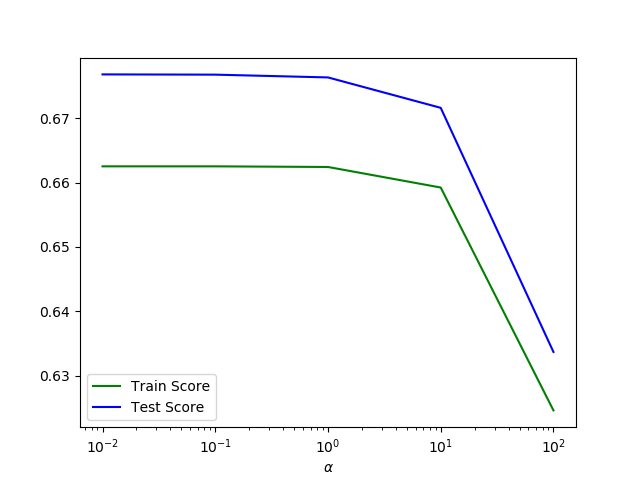

Text(0.5, 0, '$\\alpha$')

In [35]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

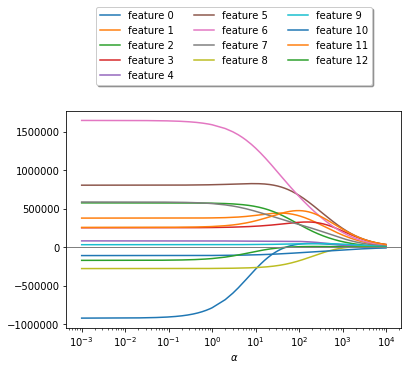

In [36]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [37]:
print(train_score_list)
print(test_score_list)

[0.6625110159880787, 0.6625098343151745, 0.6624120540029739, 0.6592235217959475, 0.6246516871508705]
[0.6767729791211128, 0.6767338645857514, 0.6763032699807559, 0.6715863834688878, 0.6337169167746469]


In [38]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.6624
Test score: 0.6763


## Bagging

### Ridge Regression

In [49]:
ridge = Ridge(alpha = 1)
ridge_bagging = BaggingRegressor(ridge, n_estimators=500, max_samples=100, bootstrap=True,random_state=0)
ridge_bagging.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge_bagging.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge_bagging.score(X_test, y_test)))

Train score: 0.5861
Test score: 0.5938


## Pasting 

### Ridge Regression

In [51]:
ridge = Ridge(alpha = 1)
ridge_bagging = BaggingRegressor(ridge, n_estimators=500, max_samples=100, bootstrap=False,random_state=0)
ridge_bagging.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge_bagging.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge_bagging.score(X_test, y_test)))

Train score: 0.5863
Test score: 0.5940


## AdaBoost

### Linear Regression

In [43]:
from sklearn.ensemble import AdaBoostRegressor

linear_ada = AdaBoostRegressor(linear_reg, n_estimators=200, learning_rate=0.5, random_state=0)
linear_ada.fit(X_train, y_train)
print('Train score: {:.4f}'.format(linear_ada.score(X_train,y_train)))
print('Test score: {:.4f}'.format(linear_ada.score(X_test, y_test)))

AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
         learning_rate=0.5, loss='linear', n_estimators=200,
         random_state=0)

### Ridge Regression

In [45]:
ridge = Ridge(alpha = 1)
ridge_ada = AdaBoostRegressor(ridge, n_estimators=200, learning_rate=0.5, random_state=0)
ridge_ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
         learning_rate=0.5, loss='linear', n_estimators=200,
         random_state=0)

In [46]:
print('Train score: {:.4f}'.format(ridge_ada.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge_ada.score(X_test, y_test)))

Train score: 0.3379
Test score: 0.3557


### Gradient Boosting

In [47]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.589
Accuracy on test set: 0.564


In [ ]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt_slow.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt_slow.score(X_test, y_test)))

<IPython.core.display.Javascript object>


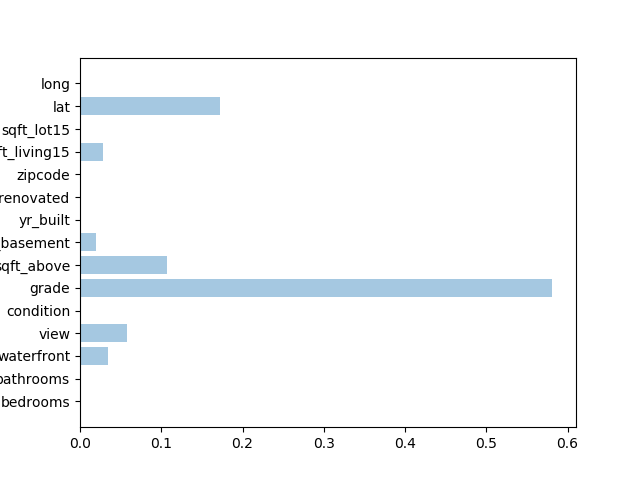

([<matplotlib.axis.YTick at 0x1a2c7529e8>,
 <a list of 15 Text yticklabel objects>)

In [61]:
%matplotlib notebook

y_list = gbrt.feature_importances_
y_pos = np.arange(len(y_list))
features = list(X.columns.values)
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)

In [ ]:
def  plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

<IPython.core.display.Javascript object>


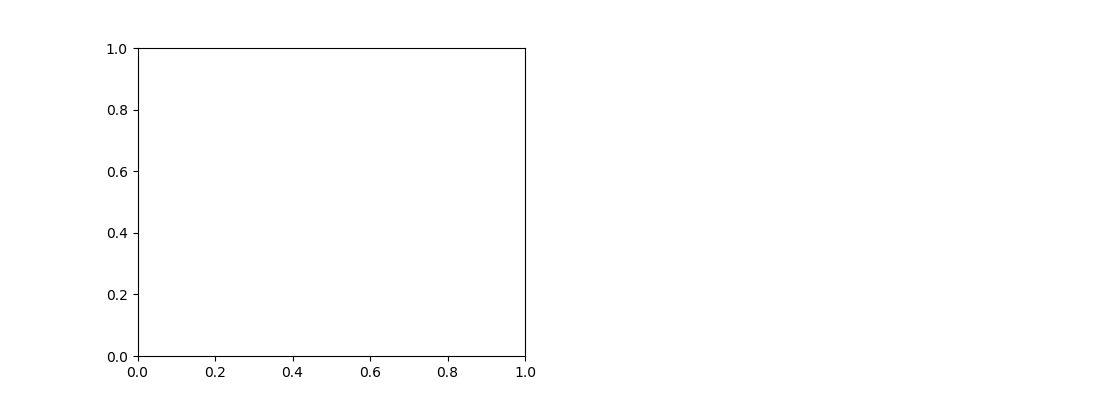

NameError: name 'plot_predictions' is not defined

In [63]:
%matplotlib notebook
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)

plt.show()

# Applying PCA on Data

In [64]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

9

In [67]:
pca = PCA(n_components = 9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 1. Linear Regression (PCA)

In [1]:
from sklearn.model_selection import GridSearchCV
model = LinearRegression()

parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)

grid_search.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

NameError: name 'LinearRegression' is not defined

In [ ]:
linear_reg = LinearRegression(copy_X = True, fit_intercept= True, normalize= False)
linear_reg.fit(X_train_pca,y_train)
print('Train score: {:.4f}'.format(linear_reg.score(X_train_pca,y_train)))
print('Test score: {:.4f}'.format(linear_reg.score(X_test_pca, y_test)))

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

linear_reg = LinearRegression(copy_X = True, fit_intercept= True, normalize= False)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(linear_reg , X_train, y_train, cv=kfold)))
scores = cross_val_score(linear_reg , X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

# Summary Linear Regression :

Train score: 0.6255
Test score: 0.6359

Best Paramenters of Linear Regression are :{'copy_X': True, 'fit_intercept': True, 'normalize': False}
Best cross-validation score: 0.62

Average cross-validation score: 0.6237

# 2. Ridge Regression (PCA)

In [92]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_pca,y_train)
    train_score_list.append(ridge.score(X_train_pca,y_train))
    test_score_list.append(ridge.score(X_test_pca, y_test))

<IPython.core.display.Javascript object>


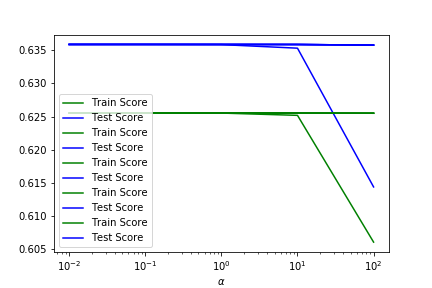

Text(0.5, 0, '$\\alpha$')

In [93]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [86]:
print(train_score_list)
print(test_score_list)

[0.6255363163663765, 0.6255362786698896, 0.6255325408733646, 0.6251879105504896, 0.6060677854316685]
[0.6358841127994798, 0.6358821581250348, 0.6358592332230683, 0.6353214897754488, 0.6143914483876289]


In [96]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train_pca,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train_pca,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test_pca, y_test)))

Train score: 0.6255
Test score: 0.6359


In [97]:
from sklearn.model_selection import GridSearchCV
model = Ridge()
parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [98]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 1}
Best cross-validation score: 0.62


In [99]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha = 1)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(ridge , X_train, y_train, cv=kfold)))
scores = cross_val_score(ridge , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.63729699 0.68024386 0.64514425 0.66932979 0.63183216 0.68682467]
0.6584452876153396


# Summary of Ridge Regression :

Train score: 0.6255
Test score: 0.6359

Best parameters: {'alpha': 1}
Best cross-validation score: 0.62

Average cross-validation score: 0.658



# 3. Lasso Regression(PCA)

In [103]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_pca,y_train)
    train_score_list.append(lasso.score(X_train_pca,y_train))
    test_score_list.append(lasso.score(X_test_pca, y_test))

In [106]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

Text(0.5, 11.200000000000003, '$\\alpha$')

In [105]:
print(train_score_list)
print(test_score_list)

[0.6255363167471584, 0.6255363167158987, 0.625536313589937, 0.6255360009937558, 0.6255047413756557]
[0.6358843191933059, 0.6358842564819052, 0.6358836265570567, 0.6358770462244588, 0.6357831344871951]


In [111]:
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

Train score: 0.6625
Test score: 0.6767


In [109]:
from sklearn.model_selection import GridSearchCV
model = Lasso()
parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [110]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 10}
Best cross-validation score: 0.62


In [112]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
 
kfold = KFold(n_splits=6)
lasso = Lasso(alpha = 10)
print("Cross-validation scores:\n{}".format(cross_val_score(lasso, X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(lasso , X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.60755197 0.64486599 0.61984156 0.62235665 0.6163025  0.63142831]
0.6237244951991364


# Summary of Lasso Regression(PCA)

Train score: 0.6625
Test score: 0.6767

Best parameters: {'alpha': 1}
Best cross-validation score: 0.62

Average cross-validation score: 0.6237


# 4.KNN Regression(PCA)

Text(0, 0.5, 'MSE')

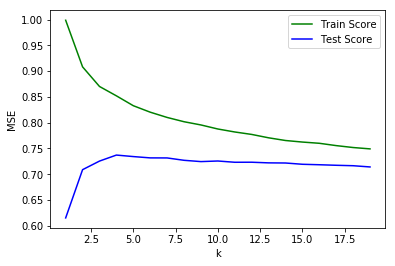

In [113]:
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train_pca, y_train)
    train_score_array.append(knn_reg.score(X_train_pca, y_train))
    test_score_array.append(knn_reg.score(X_test_pca, y_test))

x_axis = range(1,20)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [118]:
knn_reg = KNeighborsRegressor(4)
knn_reg.fit(X_train_pca, y_train)
print('Train score: {:.4f}'.format(knn_reg.score(X_train_pca, y_train)))
print('test score: {:.4f}'.format(knn_reg.score(X_test_pca, y_test)))

Train score: 0.8521
test score: 0.7371


In [115]:
from sklearn.model_selection import GridSearchCV
model = KNeighborsRegressor()
k_range = list(range(1, 21))
parameters = dict(n_neighbors=k_range)

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [264]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 7}
Best cross-validation score: 0.52


In [116]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

knn  = KNeighborsRegressor(7)  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(knn , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.73349159 0.75277246 0.76065886 0.72063017 0.72622159 0.72991208]
0.7372811245483835


# Summary for Knn Regression

Train score: 0.8521
test score: 0.7371
    
Normal Test score , Train Score Plot suggesting numbers of neighbors as 4  , but Grid search cv suggesting neigbors as 7.

Best parameters: {'n_neighbors': 7}

Avergae cross-validation score: 0.737



# 5 .Polynomial Regression

In [127]:
from  sklearn.preprocessing  import PolynomialFeatures
train_score_list = []
test_score_list = []

for n in range(1,5):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train_pca)
    X_test_poly = poly.transform(X_test_pca)
    linear_reg.fit(X_train_poly, y_train)
    train_score_list.append(linear_reg.score(X_train_poly, y_train))
    test_score_list.append(linear_reg.score(X_test_poly, y_test))

In [128]:
print(train_score_list)
print(test_score_list)

[0.6255363167474741, 0.7406993081656745, 0.8139187421300214, 0.8610939472944656]
[0.6358843261580847, 0.7539436243514617, 0.8012280245974781, 0.7183380610434511]


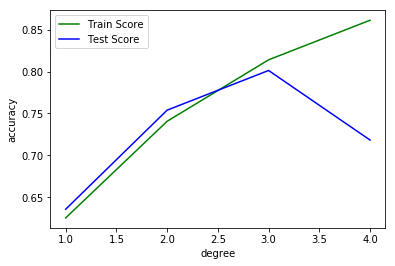

In [130]:
%matplotlib inline

x_axis = range(1,5)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

In [133]:
from sklearn.model_selection import GridSearchCV
model = LinearRegression()
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train_pca)
X_test_poly = poly.transform(X_test_pca)

parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train_poly, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [134]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': False}
Best cross-validation score: 0.79


In [135]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
linear_reg = LinearRegression(copy_X = True, fit_intercept= True, normalize= False)
  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(linear_reg , X_train_poly, y_train, cv=kfold)))
scores = cross_val_score(linear_reg , X_train_poly, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.77280819 0.79956119 0.7626221  0.78848946 0.80364662 0.81490499]
0.7903387585900389


# summary for polynomial regression

Best Parameter : Degree = 3

Train score : 0.82
test score : 0.80

Best parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': False}
Best cross-validation score: 0.79

Average cross-validation score: 0.7903



# 6.Linear Svm

In [136]:
from sklearn.svm import SVR

train = []
test = []
index = []
for C in [0.1, 1, 10, 100,1000,10000,100000]:
        #create the model
        svr = SVR(kernel = 'linear', C = C)
        
        #train the model
        svr.fit(X_train_pca, y_train)
        
        #evaluate the model
        train.append(svr.score(X_train_pca, y_train))
        test.append(svr.score(X_test_pca, y_test))
        index.append(C)

([<matplotlib.axis.XTick at 0x1a1ffe4a20>,
 <a list of 7 Text xticklabel objects>)

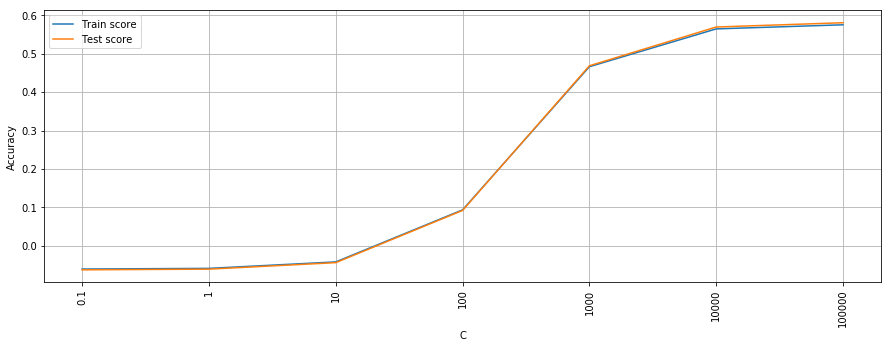

In [137]:
%matplotlib inline

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (15,5))

plt.plot(range(len(index)), train, label = 'Train score')
plt.plot(range(len(index)), test, label = 'Test score')
plt.legend()
plt.grid()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xticks(range(len(index)), index, rotation = 90)

In [139]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear',C = 100000)
        
#train the model
svr.fit(X_train_pca, y_train)
        
#evaluate the model
print(svr.score(X_train_pca, y_train))
print(svr.score(X_test_pca, y_test))

0.5750945067230087
0.5804601656082191


In [140]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svr , X_train_pca, y_train, cv=kfold)))

scores = cross_val_score(svr , X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.55684607 0.59962238 0.59873482 0.55726402 0.56872485 0.5738983 ]
0.5758484080735932


# Sumary Linear Svm

Train Score :0.57
Test Score : 0.58

Best parameters: {'C': 100000, 'kernel': 'linear'}

Average Cross-validation scores: 0.575

# 7.SVR with kernel

In [141]:
from sklearn.svm import SVR

train = []
test = []
index = []

for C in [0.1, 1, 10, 100 , 1000,10000]:
    for gamma in [0.1, 1, 10, 100,1000]:
        #create the model
        svr = SVR(kernel = 'rbf', C = C, gamma = gamma)
        
        #train the model
        svr.fit(X_train_pca, y_train)
        
        #evaluate the model
        train.append(svr.score(X_train_pca, y_train))
        test.append(svr.score(X_test_pca, y_test))
        index.append((C,gamma))

([<matplotlib.axis.XTick at 0x1a2036d3c8>,
 <a list of 30 Text xticklabel objects>)

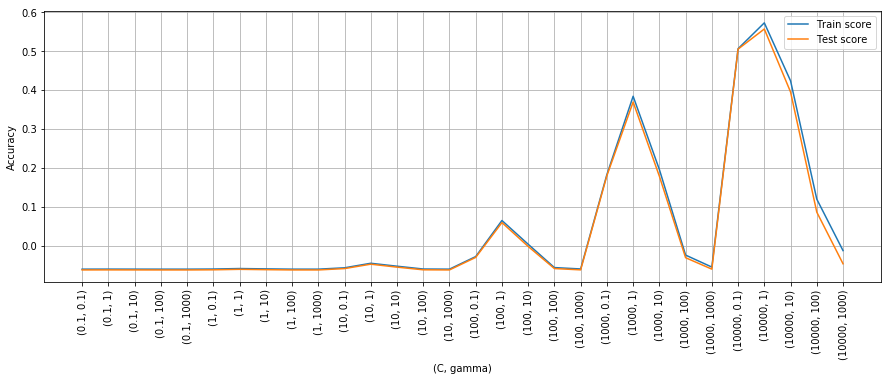

In [142]:
%matplotlib inline

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (15,5))

plt.plot(range(len(index)), train, label = 'Train score')
plt.plot(range(len(index)), test, label = 'Test score')
plt.legend()
plt.grid()
plt.xlabel('(C, gamma)')
plt.ylabel('Accuracy')
plt.xticks(range(len(index)), index, rotation = 90)

In [145]:
from sklearn.svm import SVR
#best parameters
svr = SVR(kernel = 'rbf', C = 10000, gamma = 1)
        
#train the model
svr.fit(X_train_pca, y_train)
        
#evaluate the model
print(svr.score(X_train_pca, y_train))
print(svr.score(X_test_pca, y_test))

0.5732155118098504
0.557399683798003


In [147]:
from sklearn.model_selection import GridSearchCV
model = SVR()
parameters = param_grid = {'kernel':['rbf'],'C': [100,1000,10000],'gamma': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(model,parameters, cv=5,return_train_score=True,verbose=3)
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=100, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=100, gamma=0.01, kernel=rbf, score=-0.06452399720244095, total=   7.4s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.8s remaining:    0.0s


[CV]  C=100, gamma=0.01, kernel=rbf, score=-0.079339228582199, total=   7.6s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   22.0s remaining:    0.0s


[CV]  C=100, gamma=0.01, kernel=rbf, score=-0.04129355173513849, total=   7.3s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, score=-0.05990890761876245, total=   7.4s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, score=-0.04493845629122873, total=   7.4s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=-0.04219603542631245, total=   7.3s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=-0.05643213142440495, total=   7.3s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=-0.015995269085581576, total=   7.3s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=-0.03852518328044763, total=   7.4s
[CV] C=100, gamma=0.1, k

[CV]  C=10000, gamma=10, kernel=rbf, score=0.37504169204299204, total=   6.6s
[CV] C=10000, gamma=10, kernel=rbf ...................................
[CV]  C=10000, gamma=10, kernel=rbf, score=0.34780303083625663, total=   7.1s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 10.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['rbf'], 'C': [100, 1000, 10000], 'gamma': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [148]:
print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'C': 10000, 'gamma': 1, 'kernel': 'rbf'}


In [149]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
svr = SVR(kernel = 'rbf', C = 10000, gamma = 1)

kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svr , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(svr , X_train_pca, y_train, cv=kfold)

print(np.mean(scores))


Cross-validation scores:
[0.53859746 0.59694504 0.62572842 0.52048    0.55949626 0.54005934]
0.5635510852900968


# Summary Svm with kernel

Train Score:0.573
Test Score: 0.557

Best parameters: {'C': 10000, 'gamma': 1, 'kernel': 'rbf'}

Average Cross Validation Score : 0.5635  

# SUMMARY OF REGRESSION MODELS

Polynomial regression with degree 3 gives the best average cross validation scores.


## Deep Learning

In [27]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

# fix random seed for reproducibility
numpy.random.seed(10)

Using TensorFlow backend.


In [28]:
X_train.shape

(15383, 15)

#### 1- Define Model

In [29]:
# create model
model = Sequential()
model.add(Dense(13, input_dim=15, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

Instructions for updating:
Colocations handled automatically by placer.


#### 2- Compile Model

In [30]:
# Compile model
model.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])

#### 3- Fit model

In [ ]:
model.fit(X_train, y_train, epochs = 100, batch_size = 20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100


#### 4 - Evaluate Model

In [1]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

NameError: name 'model' is not defined

In [ ]:
from sklearn.metrics import r2_score, recall_score, precision_score

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))